In [1]:
%autosave 0
import numpy as np
import pandas as pd

Autosave disabled


In [2]:
#https://www.kaggle.com/datasets/swatikhedekar/python-project-on-weather-dataset
multi_ts = pd.read_csv('Weather Data.csv')

# Data overwiew

In [3]:
multi_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [4]:
multi_ts

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [5]:
multi_ts['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

# Preprocessing

In [6]:
multi_ts['Date/Time'] = pd.to_datetime(multi_ts['Date/Time'])
multi_ts.set_index('Date/Time', inplace=True)

In [7]:
# we need to move towards numeric values to get estimations
precipitation = ['Drizzle','Rain','Showers','Snow','Thunderstorms']
multi_ts['Precipitation'] = multi_ts['Weather'].apply(lambda x: 1 if any(i in x for i in precipitation) else 0)

In [8]:
# some data condensation is conducted
multi_ts = multi_ts.resample('120min').mean()
multi_ts

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Precipitation
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.80,-3.80,86.5,4.0,8.00,101.240,0.0
2012-01-01 02:00:00,-1.65,-3.30,88.5,6.5,4.00,101.265,1.0
2012-01-01 04:00:00,-1.45,-3.30,87.5,8.0,5.60,101.250,0.0
2012-01-01 06:00:00,-1.45,-3.35,87.0,7.0,7.20,101.275,0.0
2012-01-01 08:00:00,-1.35,-3.35,86.5,12.0,6.00,101.215,0.0
...,...,...,...,...,...,...,...
2012-12-31 14:00:00,-2.85,-5.15,84.0,7.5,10.50,100.520,1.0
2012-12-31 16:00:00,-1.25,-3.65,83.5,16.0,11.30,100.350,1.0
2012-12-31 18:00:00,-0.60,-2.90,84.5,23.5,9.70,100.160,1.0


# Train/Test split

We intend to calculate predictions for 168 periods (2 weeks). Since forcast will be produced by recursive strategy, erros will acumulate (prediction for the prior time step is used as an input for making a prediction on the following time step). It is yet to see how far into the future sensible predictions can be obtained.

In [9]:
# keep in mind that period now corresponds to 2 hours
train_ts = multi_ts.iloc[:-(12*14)]
test_ts = multi_ts.iloc[-(12*14):]

In [10]:
train_ts.shape

(4224, 7)

In [11]:
test_ts.shape

(168, 7)

# Time series vizualizations

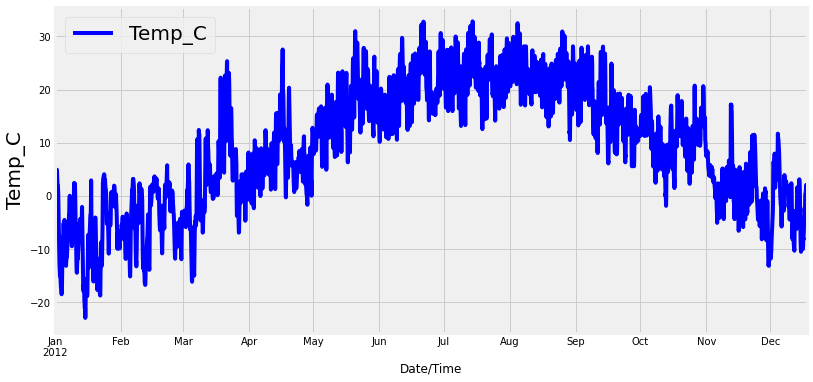

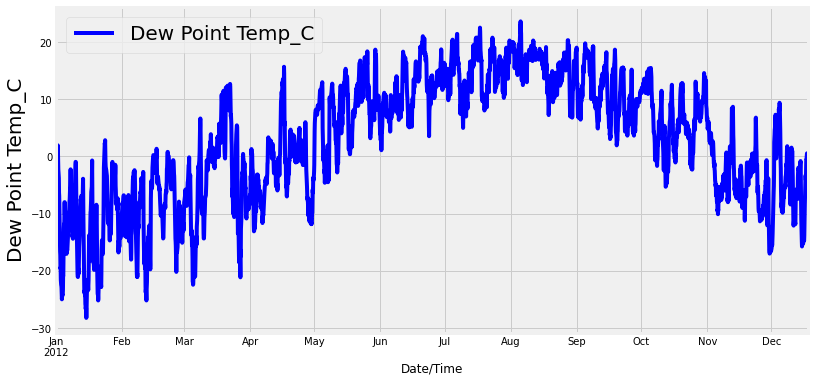

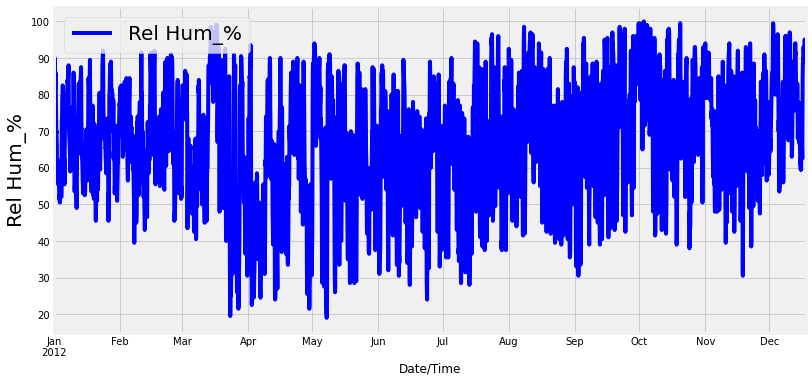

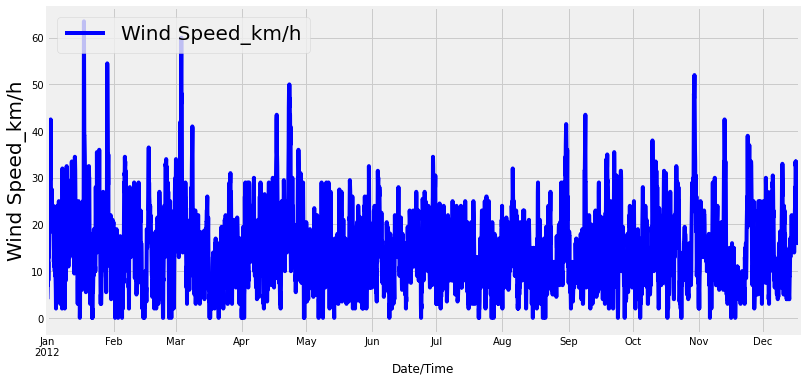

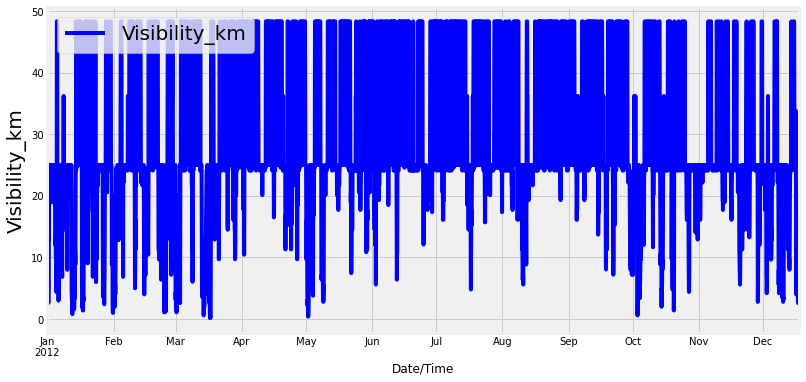

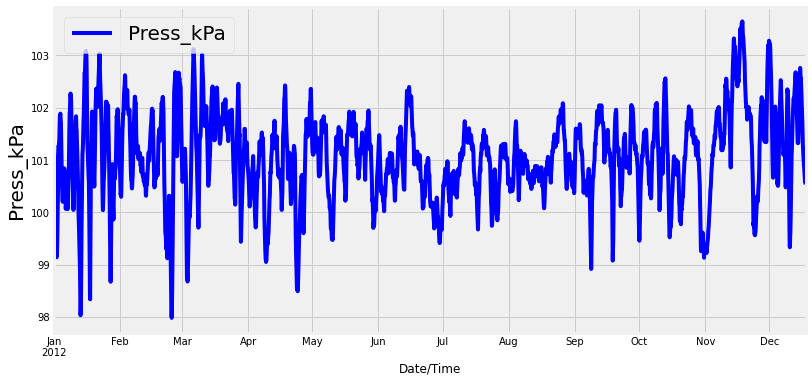

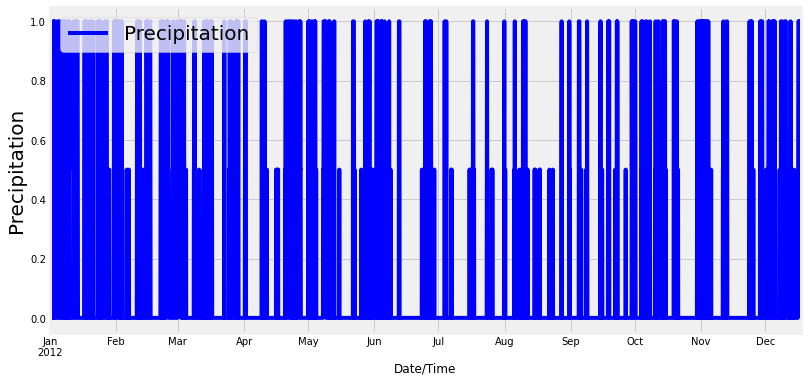

In [12]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

for col in train_ts.columns:
    train_ts[col].plot(color='blue')
    plt.ylabel(col, size = 20)
    plt.gcf().set_size_inches(12, 6)
    plt.legend(loc=2, prop={'size': 20})
    plt.show()

# VAR model assumptions / time series tranformations

### Stationarity/Cointegration

In [13]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
# adopted from https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [14]:
for name, column in train_ts.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Temp_C" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5174
 No. Lags Chosen       = 31
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.1113. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Dew Point Temp_C" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.3433
 No. Lags Chosen       = 31
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0131. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Rel Hum_%" 
    -----------------------------------------------
 Null Hypothesis: Data has unit roo

It is close but not quite there. Let’s difference all of them once and check again.

In [15]:
train_ts_diff = train_ts.diff().dropna()

In [16]:
for name, column in train_ts_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Temp_C" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -17.2666
 No. Lags Chosen       = 31
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Dew Point Temp_C" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -16.3131
 No. Lags Chosen       = 30
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Rel Hum_%" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signif

Since stationarity has been achived, we will not pursue cointegration testing; assumption has been met.

### Granger’s causality tests

In [17]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
# adopted from https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

grangers_causation_matrix(train_ts_diff, variables = train_ts_diff.columns)

/home/petewojtczak/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/home/petewojtczak/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,Temp_C_x,Dew Point Temp_C_x,Rel Hum_%_x,Wind Speed_km/h_x,Visibility_km_x,Press_kPa_x,Precipitation_x
Temp_C_y,1.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000
Dew Point Temp_C_y,0.0,1.0,0.0000,0.0000,0.0035,0.0,0.0030
Rel Hum_%_y,0.0,0.0,1.0000,0.0000,0.0000,0.0,0.0000
Wind Speed_km/h_y,0.0,0.0,0.0000,1.0000,0.0000,0.0,0.0001
Visibility_km_y,0.0,0.0,0.0000,0.0000,1.0000,0.0,0.0000
Press_kPa_y,0.0,0.0,0.0000,0.0000,0.0000,1.0,0.0000
Precipitation_y,0.0,0.0,0.0069,0.0257,0.0000,0.0,1.0000


Since all elements of the above matrix are smaller than our significance level 0,05 (except diagonal elements, obviously), this time series (variables) works as a system and this data seems to be a good candidate for forecasting with VAR. 

# Modelling

### Selecting the Order (P) of VAR model

In [18]:
from statsmodels.tsa.api import VAR

model = VAR(train_ts_diff)
x = model.select_order(maxlags=30)
x.summary()

,AIC,BIC,FPE,HQIC
0,1.787,1.798,5.971,1.791
1,-0.2414,-0.1567,0.7856,-0.2114
2,-0.4144,-0.2557,0.6607,-0.3583
3,-0.5427,-0.3098,0.5812,-0.4604
4,-0.6878,-0.3808,0.5027,-0.5792
5,-0.8210,-0.4399,0.4400,-0.6862
6,-0.9224,-0.4672,0.3975,-0.7615
7,-1.025,-0.4952,0.3590,-0.8373
8,-1.125,-0.5221*,0.3245,-0.9121
9,-1.181,-0.5038,0.3069,-0.9417


Suggested lag order of the model is 25, but we would not want to inflate no. of estimated parameters that much. We can see that AIC is decreasing consistently up to the 14-th lag and then starts growing for few subsequent lags. Therefore, we would choose order of the model to be 14.

### Training the model

In [19]:
fitted_model = model.fit(14)
fitted_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 07, Sep, 2022
Time:                     07:46:45
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                  -0.365396
Nobs:                     4209.00    HQIC:                  -1.04072
Log likelihood:          -38145.7    FPE:                   0.244139
AIC:                     -1.41008    Det(Omega_mle):        0.207472
--------------------------------------------------------------------
Results for equation Temp_C
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       -0.000001         0.016063           -0.000           1.000
L1.Temp_C                    0.620103         0.048848           12.695           0.000
L1.Dew Point Temp_C         -0.

### Testing serial correlation of residuals using Durbin-Watson tests

Serial correlation of residuals is used to check if there is any leftover pattern in the residuals (errors).

In [20]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(fitted_model.resid)
for col, val in zip(train_ts_diff.columns, out):
    print(col, ':', round(val, 3))

Temp_C : 1.997
Dew Point Temp_C : 2.002
Rel Hum_% : 1.998
Wind Speed_km/h : 2.002
Visibility_km : 2.002
Press_kPa : 1.997
Precipitation : 2.003


Durbin-Watson tests indicates the correct specification of the model.

# Forecasting

In [21]:
lag_order = fitted_model.k_ar
forecast_input = train_ts_diff.values[-lag_order:]
fcst = fitted_model.forecast(y=forecast_input, steps=test_ts.shape[0])
df_forecast = pd.DataFrame(fcst, index=test_ts.index, columns=train_ts_diff.columns+'_1d')
df_forecast

,Temp_C_1d,Dew Point Temp_C_1d,Rel Hum_%_1d,Wind Speed_km/h_1d,Visibility_km_1d,Press_kPa_1d,Precipitation_1d
Date/Time,,,,,,,
2012-12-18 00:00:00,-0.045077,-0.343668,-0.883658,2.590337,-0.776245,-0.052995,0.340118
2012-12-18 02:00:00,-0.152596,0.141821,1.031136,0.552117,-1.150473,-0.028729,0.154683
2012-12-18 04:00:00,-0.104498,0.156253,1.034321,-0.077337,-2.276527,-0.034230,0.071594
2012-12-18 06:00:00,0.398096,0.344457,-0.328823,-0.228668,0.050264,-0.022400,0.074895
2012-12-18 08:00:00,0.692166,0.446122,-1.032801,1.267431,0.092266,-0.030682,0.033588
...,...,...,...,...,...,...,...
2012-12-31 14:00:00,0.004613,0.000190,-0.010894,-0.007697,-0.040786,-0.000703,0.000263
2012-12-31 16:00:00,-0.013153,-0.000443,0.048847,-0.022213,-0.065708,-0.000234,0.000184
2012-12-31 18:00:00,-0.025220,-0.000594,0.090396,-0.029381,-0.072078,0.000195,0.000109


### Inverting the forecast to the original scale

In [22]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

forecast = invert_transformation(train_ts, df_forecast)
# adopted from https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [23]:
forecast.columns

Index(['Temp_C_1d', 'Dew Point Temp_C_1d', 'Rel Hum_%_1d',
       'Wind Speed_km/h_1d', 'Visibility_km_1d', 'Press_kPa_1d',
       'Precipitation_1d', 'Temp_C_forecast', 'Dew Point Temp_C_forecast',
       'Rel Hum_%_forecast', 'Wind Speed_km/h_forecast',
       'Visibility_km_forecast', 'Press_kPa_forecast',
       'Precipitation_forecast'],
      dtype='object')

In [24]:
forecast.drop(forecast.columns[list(np.arange(train_ts.shape[1]))], axis=1, inplace=True)
forecast

,Temp_C_forecast,Dew Point Temp_C_forecast,Rel Hum_%_forecast,Wind Speed_km/h_forecast,Visibility_km_forecast,Press_kPa_forecast,Precipitation_forecast
Date/Time,,,,,,,
2012-12-18 00:00:00,1.504923,-0.343668,88.616342,19.090337,16.923755,100.477005,0.340118
2012-12-18 02:00:00,1.352326,-0.201846,89.647478,19.642454,15.773283,100.448276,0.494802
2012-12-18 04:00:00,1.247829,-0.045593,90.681799,19.565117,13.496756,100.414046,0.566396
2012-12-18 06:00:00,1.645925,0.298863,90.352976,19.336449,13.547020,100.391646,0.641291
2012-12-18 08:00:00,2.338091,0.744985,89.320175,20.603879,13.639286,100.360963,0.674879
...,...,...,...,...,...,...,...
2012-12-31 14:00:00,1.416280,-0.319439,88.843007,20.343023,13.548782,100.452621,0.646546
2012-12-31 16:00:00,1.403127,-0.319883,88.891854,20.320810,13.483075,100.452387,0.646730
2012-12-31 18:00:00,1.377907,-0.320477,88.982250,20.291429,13.410997,100.452582,0.646839


# Evaluation 

In [25]:
evaluation_df = test_ts.join(forecast)
evaluation_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2012-12-18 00:00:00 to 2012-12-31 22:00:00
Freq: 120T
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temp_C                     168 non-null    float64
 1   Dew Point Temp_C           168 non-null    float64
 2   Rel Hum_%                  168 non-null    float64
 3   Wind Speed_km/h            168 non-null    float64
 4   Visibility_km              168 non-null    float64
 5   Press_kPa                  168 non-null    float64
 6   Precipitation              168 non-null    float64
 7   Temp_C_forecast            168 non-null    float64
 8   Dew Point Temp_C_forecast  168 non-null    float64
 9   Rel Hum_%_forecast         168 non-null    float64
 10  Wind Speed_km/h_forecast   168 non-null    float64
 11  Visibility_km_forecast     168 non-null    float64
 12  Press_kPa_forecast         168 non-null    float64
 13  Pr

### Plotting the forecast and actual data

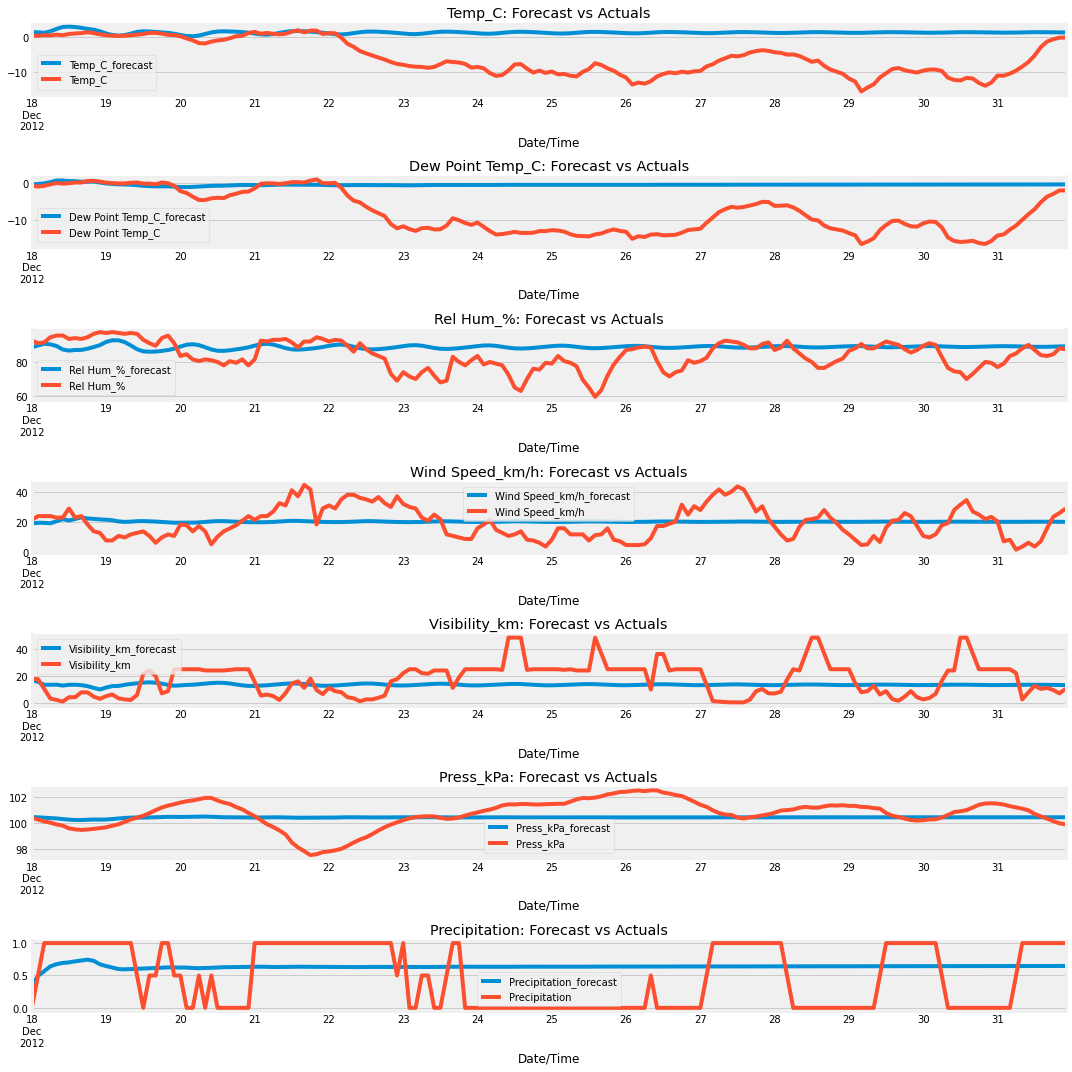

In [26]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15,15))
for i, (col,ax) in enumerate(zip(multi_ts.columns, axes.flatten())):
    evaluation_df[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    evaluation_df[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=10)
    
plt.tight_layout()

As can be seen, model produced sensible wheather predictions for 24-48 periods (2-4 days), depending on variable. 

### Metrics evaluation

Metrics are calucuated for a 4-day forecast which translates to 48 periods in our case. 

In [27]:
evaluation_df = evaluation_df.iloc[:48]

In [28]:
evaluation_df

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Precipitation,Temp_C_forecast,Dew Point Temp_C_forecast,Rel Hum_%_forecast,Wind Speed_km/h_forecast,Visibility_km_forecast,Press_kPa_forecast,Precipitation_forecast
Date/Time,,,,,,,,,,,,,,
2012-12-18 00:00:00,0.35,-0.70,92.5,21.5,17.70,100.405,0.0,1.504923,-0.343668,88.616342,19.090337,16.923755,100.477005,0.340118
2012-12-18 02:00:00,0.40,-0.90,91.0,24.0,17.70,100.280,0.5,1.352326,-0.201846,89.647478,19.642454,15.773283,100.448276,0.494802
2012-12-18 04:00:00,0.55,-0.70,91.5,24.0,10.50,100.135,1.0,1.247829,-0.045593,90.681799,19.565117,13.496756,100.414046,0.566396
2012-12-18 06:00:00,0.50,-0.30,94.5,24.0,3.40,100.035,1.0,1.645925,0.298863,90.352976,19.336449,13.547020,100.391646,0.641291
2012-12-18 08:00:00,0.70,0.05,95.5,23.0,2.40,99.900,1.0,2.338091,0.744985,89.320175,20.603879,13.639286,100.360963,0.674879
2012-12-18 10:00:00,0.55,-0.10,95.5,23.0,1.20,99.810,1.0,2.894180,0.739896,87.298876,21.999772,12.984383,100.314675,0.694043
2012-12-18 12:00:00,0.90,0.00,93.5,29.0,4.40,99.600,1.0,2.983241,0.580981,86.649182,21.154012,13.546571,100.269933,0.702086
2012-12-18 14:00:00,1.05,0.20,94.0,23.0,4.40,99.520,1.0,2.867480,0.556763,87.035030,22.089239,13.614332,100.243610,0.718421
2012-12-18 16:00:00,1.15,0.20,93.5,24.0,8.00,99.480,1.0,2.640395,0.418050,87.066102,23.166062,13.276564,100.244001,0.731732


In [29]:
from statsmodels.tsa.stattools import acf

def evaluation_metrics(y_test, y_pred):
    MAE = np.mean(np.abs(y_pred - y_test))    # MAE
    RMSE = np.mean((y_pred - y_test)**2)**.5  # RMSE
    corr = np.corrcoef(y_pred, y_test)[0,1]   # corr
    return({'MAE': MAE, 'RMSE':RMSE, 'corr':corr})

In [30]:
for col in multi_ts.columns:
    print('\n')
    print('Forecast Accuracy of: {}'.format(col))
    accuracy = evaluation_metrics(evaluation_df[col+'_forecast'].values, evaluation_df[col])
    for k, v in accuracy.items():
        print(k, ': ', round(v,3))



Forecast Accuracy of: Temp_C
MAE :  0.914
RMSE :  1.189
corr :  0.36


Forecast Accuracy of: Dew Point Temp_C
MAE :  1.063
RMSE :  1.479
corr :  0.492


Forecast Accuracy of: Rel Hum_%
MAE :  5.724
RMSE :  6.163
corr :  0.249


Forecast Accuracy of: Wind Speed_km/h
MAE :  7.51
RMSE :  9.279
corr :  0.011


Forecast Accuracy of: Visibility_km
MAE :  7.671
RMSE :  8.377
corr :  0.407


Forecast Accuracy of: Press_kPa
MAE :  0.911
RMSE :  1.164
corr :  0.468


Forecast Accuracy of: Precipitation
MAE :  0.367
RMSE :  0.402
corr :  0.381
